Multivariate Data and the Grammar of Graphics

In [1]:
import pandas as pd
df = pd.read_csv("https://datasci112.stanford.edu/data/penguins.csv")  
df       # flipper (yüzgeç)

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0       Adelie  Torgersen            39.1           18.7              181.0   
1       Adelie  Torgersen            39.5           17.4              186.0   
2       Adelie  Torgersen            40.3           18.0              195.0   
3       Adelie  Torgersen             NaN            NaN                NaN   
4       Adelie  Torgersen            36.7           19.3              193.0   
..         ...        ...             ...            ...                ...   
339  Chinstrap      Dream            55.8           19.8              207.0   
340  Chinstrap      Dream            43.5           18.1              202.0   
341  Chinstrap      Dream            49.6           18.2              193.0   
342  Chinstrap      Dream            50.8           19.0              210.0   
343  Chinstrap      Dream            50.2           18.7              198.0   

     body_mass_g     sex  year  
0         3750.0    male  2007  
1         3800.0  female  2007  
2         3250.0  female  2007  
3            NaN     NaN  2007  
4         3450.0  female  2007  
..           ...     ...   ...  
339       4000.0    male  2009  
340       3400.0  female  2009  
341       3775.0    male  2009  
342       4100.0    male  2009  
343       3775.0  female  2009  

[344 rows x 8 columns]

In [2]:
df[["species", "island"]].value_counts().unstack().fillna(0)

island     Biscoe  Dream  Torgersen
species                            
Adelie       44.0   56.0       52.0
Chinstrap     0.0   68.0        0.0
Gentoo      124.0    0.0        0.0

In [3]:
df.groupby("species")[["bill_length_mm", "bill_depth_mm"]].mean()

bill_length_mm  bill_depth_mm
species                                 
Adelie          38.791391      18.346358
Chinstrap       48.833824      18.420588
Gentoo          47.504878      14.982114

In [4]:
df[["bill_length_mm", "bill_depth_mm"]].mean()

bill_length_mm    43.92193
bill_depth_mm     17.15117
dtype: float64

Relationships between Quantitative Variables

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

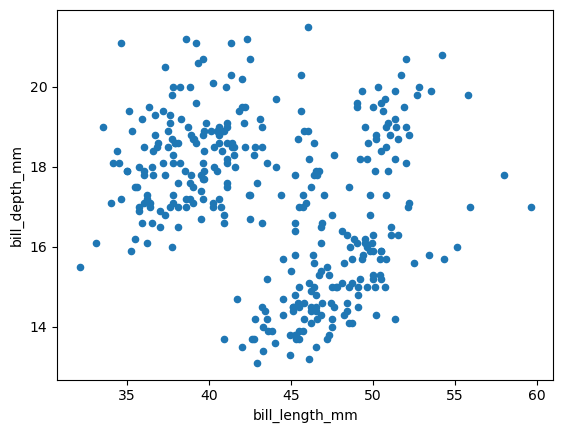

In [5]:
df.plot.scatter(x="bill_length_mm", y="bill_depth_mm")

In [6]:
# calculating r (correlation coefficient) manually
x = df["bill_length_mm"]
y = df["bill_depth_mm"]
n = (~x.isnull() & ~y.isnull()).sum()

r = (((x - x.mean()) / x.std()) * ((y - y.mean()) / y.std())).sum() / (n - 1)
r

np.float64(-0.23505287035553266)

In [7]:
df[["bill_length_mm", "bill_depth_mm"]].corr()

bill_length_mm  bill_depth_mm
bill_length_mm        1.000000      -0.235053
bill_depth_mm        -0.235053       1.000000

Plotly

In [14]:
import plotly.express as px

Let's create a scatterplot where we map:

x --> bill length
y --> bill depth
color --> species
As a bonus, all of the plots that Plotly makes are interactive! Try hovering your cursor over a point or selecting a region of the scatterplot.

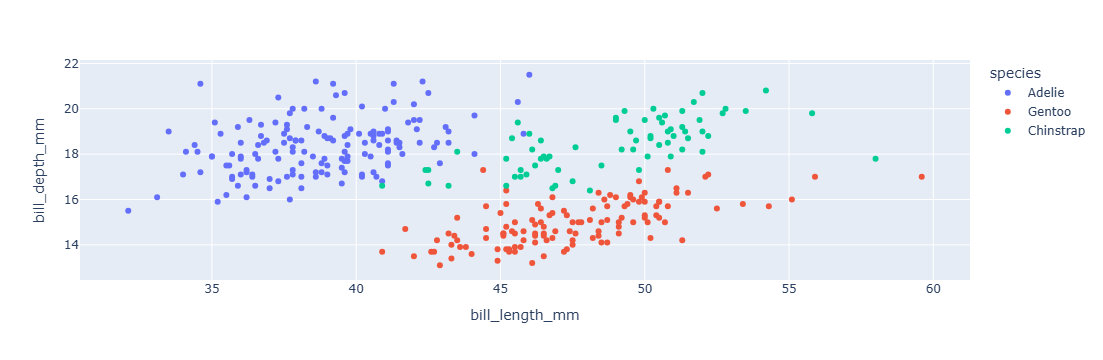

In [9]:
px.scatter(df, x="bill_length_mm", y="bill_depth_mm", color="species")

What is the correlation between bill length and bill depth, conditional on species?

In [10]:
df.groupby("species")[["bill_length_mm", "bill_depth_mm"]].corr()

bill_length_mm  bill_depth_mm
species                                                
Adelie    bill_length_mm        1.000000       0.391492
          bill_depth_mm         0.391492       1.000000
Chinstrap bill_length_mm        1.000000       0.653536
          bill_depth_mm         0.653536       1.000000
Gentoo    bill_length_mm        1.000000       0.643384
          bill_depth_mm         0.643384       1.000000

We can make facets using facet_row= or facet_col=. For example, if we wanted to represent species using columns (instead of color), then we would do the following:

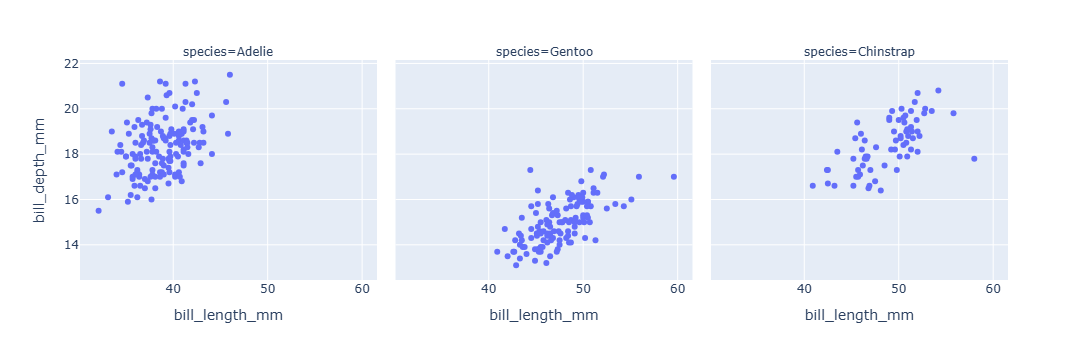

In [11]:
px.scatter(df, x="bill_length_mm", y="bill_depth_mm",
           facet_col="species")

You can have both row and column facets.

In [12]:
px.scatter(df, x="bill_length_mm", y="bill_depth_mm",
           facet_col="species", facet_row="island")

Remember that in the grammar of graphics, you can have aesthetic mappings with any type of geometric object. So try Plotly on bar plots and histograms!

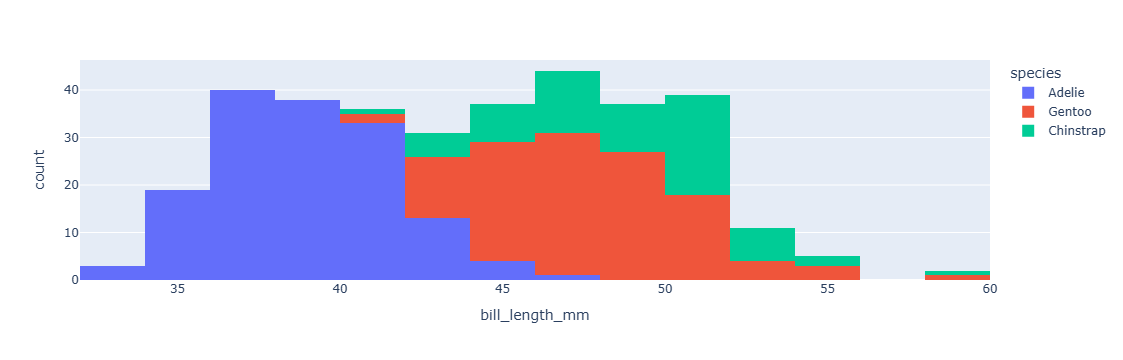

In [13]:
px.histogram(df, x="bill_length_mm", color="species")

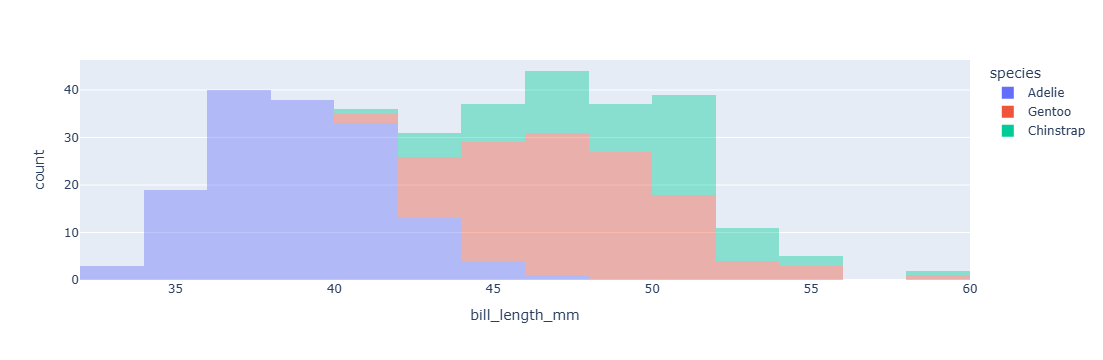

In [17]:
px.histogram(df, x="bill_length_mm", color="species", opacity=0.4)